# Garbage

In [5]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
time1 = time.time()
print(time1)
batch_size = [36]
device = 9
model_name_list = ["densenet121"]


1591117020.2473428


In [2]:
model1 = models.densenet121(pretrained = False)
model1


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [3]:
model1.classifier = nn.Linear(1024,6)
model1

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

densenet161_36_notrans
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.2548, Accuracy: 52.2059%,Valid: Loss: 1.6416, Accuracy: 56.0976%,Time: 17.4888s
Epoch: 2
Epoch: 002, Training: Loss: 1.4851, Accuracy: 38.8575%,Valid: Loss: 1.4076, Accuracy: 41.4634%,Time: 16.8752s
Epoch: 3
Epoch: 003, Training: Loss: 1.2617, Accuracy: 50.9050%,Valid: Loss: 1.2093, Accuracy: 53.6585%,Time: 16.8831s
Epoch: 4
Epoch: 004, Training: Loss: 1.2040, Accuracy: 53.2240%,Valid: Loss: 1.2329, Accuracy: 52.1341%,Time: 16.7204s
Epoch: 5
Epoch: 005, Training: Loss: 1.1481, Accuracy: 54.4683%,Valid: Loss: 1.2039, Accuracy: 55.4878%,Time: 16.6039s
Epoch: 6
Epoch: 006, Training: Loss: 1.0428, Accuracy: 61.0860%,Valid: Loss: 1.1165, Accuracy: 60.6707%,Time: 16.7525s
Epoch: 7
Epoch: 007, Training: Loss: 1.0439, Accuracy: 60.8032%,Valid: Loss: 1.1207, Accuracy: 59.4512%,Time: 16.3419s
Epoch: 8
Epoch: 008, Training: Loss: 0.9488, Accuracy: 65.3846%,Valid: Loss: 1.0676, Accuracy: 61.8902%,Time: 16.6512s
Epoch: 9
Epoch: 

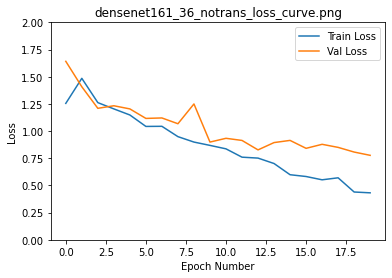

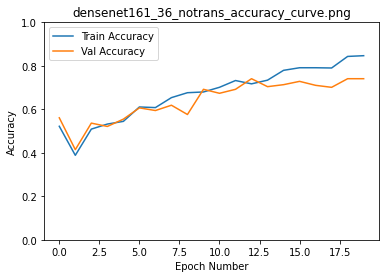

354.5819344520569


In [6]:
model_list = [model1]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
for size in batch_size:
    i = 0
    for models in model_list:
        file_name = model_name_list[i]+'_'+str(size)+'_'+"notrans"
        print(file_name)
        optimizer = optim.Adam(models.parameters())
        trainmodel(model_name=models,loss = lossfunc,batchsize=size,opti=optimizer,\
                   epoch_num=20,device_num=device,filename=file_name)
        i+=1
time2 = time.time()
print(time2-time1)